# Raggi Cosmici
Generiamo con una simulazione Monte Carlo una distribuzione di raggi cosmici sul nostro apparato sperimentale al fine di stimarne il rate

## Generazione della distribuzione di raggi cosmici

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import ROOT
import array
import mpl_toolkits.mplot3d as a3
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection


In [13]:
def cosm_dir():
    return math.acos((1-random.random())**(1/3)), 2*math.pi*random.random()



In [57]:


#Generiamo la distirbuzione di raggi cosmici usando il metodo dell'inversione della cumulativa. 
n = 800
thetas = np.empty(n)
phis = np.empty(n)
us = np.empty(n)
vs = np.empty(n)
ws = np.empty(n)
for i in range(n):
    th, ph = cosm_dir()
    thetas[i], phis[i] = th,ph
    ct, st = math.cos(th), math.sin(th)
    cp, sp = math.cos(ph), math.sin(ph)
    us[i], vs[i], ws[i] = st*cp , st*sp ,ct
    


#print(us)
#us,ys e ws rappresentano le direzioni dei raggi cosmici

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).


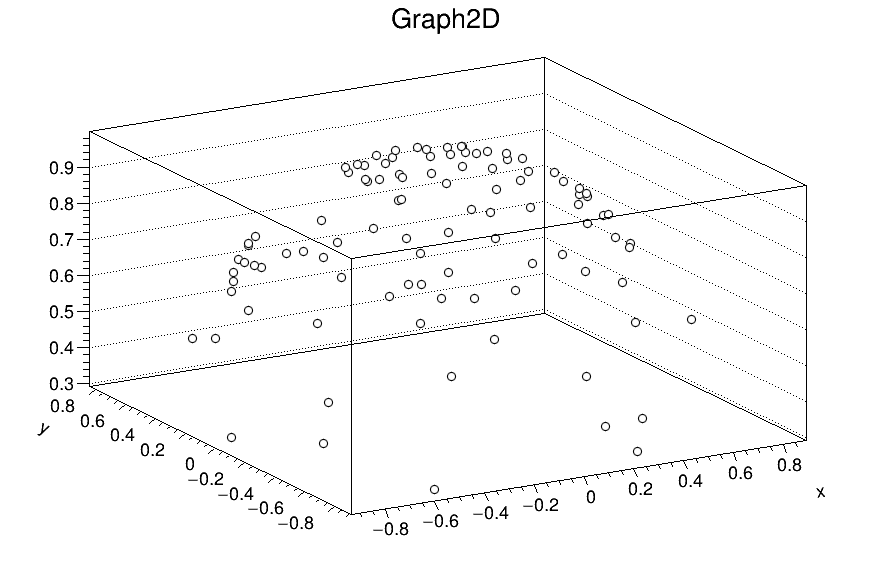

In [58]:
#Creiamo un grafico per "vedere" la distribuzione dei raggi cosmici
nmax = 100
c = ROOT.TCanvas("c1", "raggi cosmici", 0, 0, 900, 600)
g1 = ROOT.TGraph2D(len(us[:nmax]), array.array("f",us[:nmax]), array.array("f",vs[:nmax]), 
                  array.array("f", ws[:nmax]))
g1.GetXaxis().SetTitle("x")
g1.GetXaxis().SetTitleOffset(2)
g1.GetYaxis().SetTitle("y")
g1.GetYaxis().SetTitleOffset(2)
g1.GetZaxis().SetTitle("z")
g1.GetZaxis().SetTitleOffset(2)
g1.Draw()
c.Draw()


## Visualizzazione di raggi cosmici che impattano su un piano


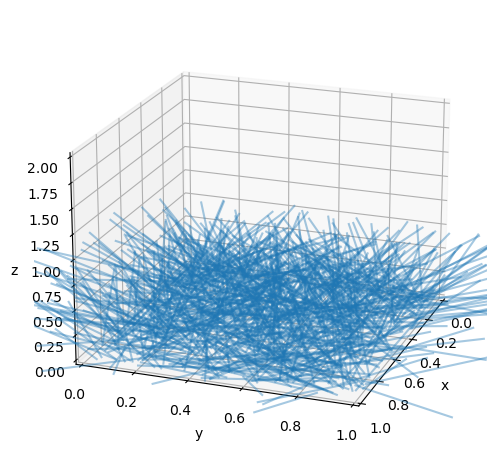

In [59]:
#Costruiamo dei punti di impatto in maniera randomica. In particolare vogliamo rappresentare i raggi
#che impattano su un piano con z=0 
x0s, y0s, z0s = np.random.uniform(0,1,n), np.random.uniform(0,1,n), np.zeros(n)
fig = plt.figure(figsize=(6,6),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)


ax.quiver(x0s[:n], y0s[:n], z0s[:n], us[:n], vs[:n], ws[:n], length=0.6, arrow_length_ratio=0,
          normalize=True, alpha=0.4)
ax.set_xlim3d(0,1)
ax.set_ylim3d(0,1)
ax.set_zlim3d(0,2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

In [60]:
#Questa funzione serve per costruire il cubo
def cuboid_data2(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
    X = np.array(X).astype(float)
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    
    return X

def createSolid(sizes,positions, quota = 0, fillColor='#0000ff20', edgeColor='#0000ff',getImpactPlane = False, N=1000):
    
    '''
    a,b,c: lunghezze dei lati
    quota: altezza iniziale
    fillColor, edgeColor: colore di riempimento e di linea di contorno (il default è blu)
    getImpacPlane: ritorna array con N punti generati in accordo alla figura
    N: deve essere uguale al numero di eventi generato (se si vuole calcolare il rate di coincidenze)
    '''
   
    solid =a3.art3d.Poly3DCollection(cuboid_data2(positions,sizes))
    solid.set_color(fillColor)
    solid.set_edgecolor(edgeColor)
    if not getImpactPlane: 
        return solid
    else:
        c= solid._vec
        x = np.random.uniform(c[0].min(), c[0].max(), N)
        y = np.random.uniform(c[1].min(), c[1].max(), N)
        return solid, x, y


In [61]:


tuk, xt, yt = createSolid([26,51.9,14.2], [0,11.3,9.1], 
                  fillColor= "#ff4dff20", edgeColor=  '#ff4bff',
                          getImpactPlane= True, N = n)
#ax.add_collection3d(tuk)


csi, xc,yc = createSolid([8,20,8], [9,42.4,10.1], 
                  fillColor = "#ff004e20", edgeColor = '#ff004e', 
                        getImpactPlane = True, N= n)
#ax.add_collection3d(csi)


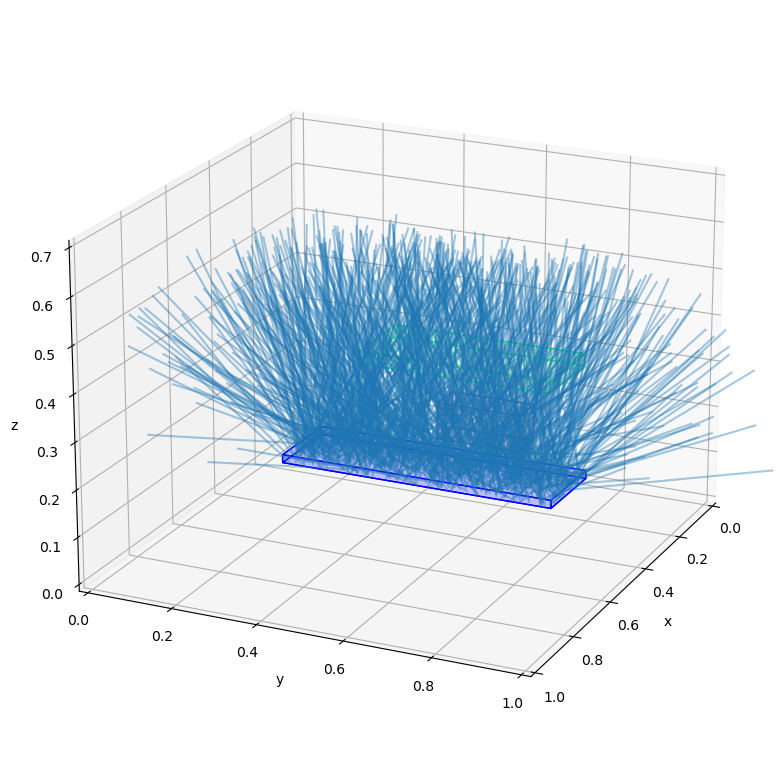

800


In [62]:
fig = plt.figure(figsize = (10,10), dpi = 100)
ax = fig.add_subplot(111, projection='3d')

xmin,xmax = 0,1
ymin,ymax  = 0,1
zmin,zmax = 0,1
ax.view_init(20,25)
ax.set_xlim3d(0,1)
ax.set_ylim3d(0,1)
ax.set_zlim3d(0,0.7)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

a_dw, b_dw, c_dw  = 0.201,0.665,0.018
x0_dw, y0_dw, z0_dw = 0,0.05,0
s_dw,x_dw,y_dw = createSolid([a_dw,b_dw,c_dw],[x0_dw,y0_dw,z0_dw], getImpactPlane = True, N = n)
ax.add_collection3d(s_dw)
z_dw = np.full(x_dw.shape[0], 0)

a_up,b_up,c_up = 0.201,0.466,0.026
x0_up,y0_up,z0_up = 0,0.242,0.252
s_up,x_up,y_up = createSolid([a_up,b_up,c_up],[x0_up,y0_up,z0_up], fillColor = "#24ff8120", edgeColor = '#24ff81',
                         getImpactPlane = True, N= n)
ax.add_collection3d(s_up)


a_cs,b_cs, c_cs = 0.08,0.20,0.08
x0_cs,y0_cs,z0_cs = 0.09,0.424,0.101
csi, x_cs,y_cs = createSolid([a_cs,b_cs,c_cs], [x0_cs,y0_cs,z0_cs], 
                  fillColor = "#884e8420", edgeColor = '#884e84', 
                        getImpactPlane = True, N= n)
ax.add_collection3d(csi)


ax.quiver(x_dw[:n], y_dw[:n], z_dw[:n], us[:n], vs[:n], ws[:n], length=0.5, arrow_length_ratio=0,
          normalize=True, alpha=0.4)

plt.show()
print(len(x_dw))

In [64]:
quota_cs= z0_cs +c_cs
quota_up = z0_up + c_up
x1_up = x_dw + quota_up*us/ws
y1_up = y_dw + quota_up*vs/ws
z1_up = np.full(n,quota_up)
x1_cs = x_dw + (quota_cs*us)/ws
y1_cs = y_dw + (quota_cs*vs)/ws
z1_cs = np.full(n, quota_cs)
#print(x0_dw, x0_dw +a_dw)
#print(x1_dw)
hits = ((x0_cs < x1_cs)&(x1_cs<(x0_cs + a_cs)) &(y0_cs < y1_cs) &(y1_cs<(y0_cs + b_cs)) 
        & (x0_up < x1_up) & (x1_up < (x0_up + a_up)) & (y0_up < y1_up) & (y1_up < (y0_up + b_up))) 

#print(hits)
print(np.count_nonzero(hits), '/', hits.shape[0])
colors = ['red' if hit else 'cornflowerblue' for hit in hits]

49 / 800


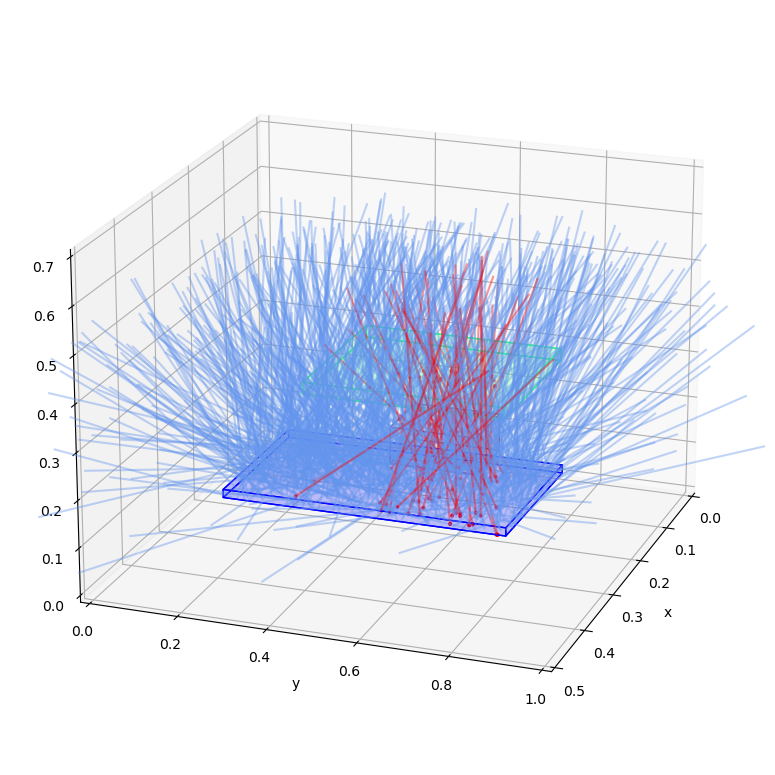

In [65]:
fig = plt.figure(figsize=(10,10),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
#print(z_dw)
#print(us)
ax.quiver(x_dw[:n], y_dw[:n], z_dw[:n], us[:n], vs[:n], ws[:n], length=0.5, arrow_length_ratio=0,
normalize=True, color=colors, alpha=0.4)

ax.scatter(x_dw[hits], y_dw[hits], z_dw[hits], s=4, color='red')
ax.scatter(x1_up[hits], y1_up[hits], z1_up[hits], s=4, color='red')
ax.scatter(x1_cs[hits], y1_cs[hits], z1_cs[hits], s=4, color='red')

ax.set_xlim3d(xmin, 0.5)
ax.set_ylim3d(ymin, ymax)
ax.set_zlim3d(zmin, 0.7)
ax.set_xlabel('x')
ax.set_ylabel('y')

s_dw= createSolid([a_dw,b_dw,c_dw],[x0_dw,y0_dw,z0_dw], getImpactPlane = False, N = n)
ax.add_collection3d(s_dw)

s_up= createSolid([a_up,b_up,c_up],[x0_up,y0_up,z0_up], fillColor = "#24ff8120", edgeColor = '#24ff81',
                         getImpactPlane = False, N= n)
ax.add_collection3d(s_up)

csi, x_cs,y_cs = createSolid([a_cs,b_cs,c_cs], [x0_cs,y0_cs,z0_cs], 
                  fillColor = "#884e8420", edgeColor = '#884e84', 
                        getImpactPlane = True, N= n)
ax.add_collection3d(csi)

plt.show()

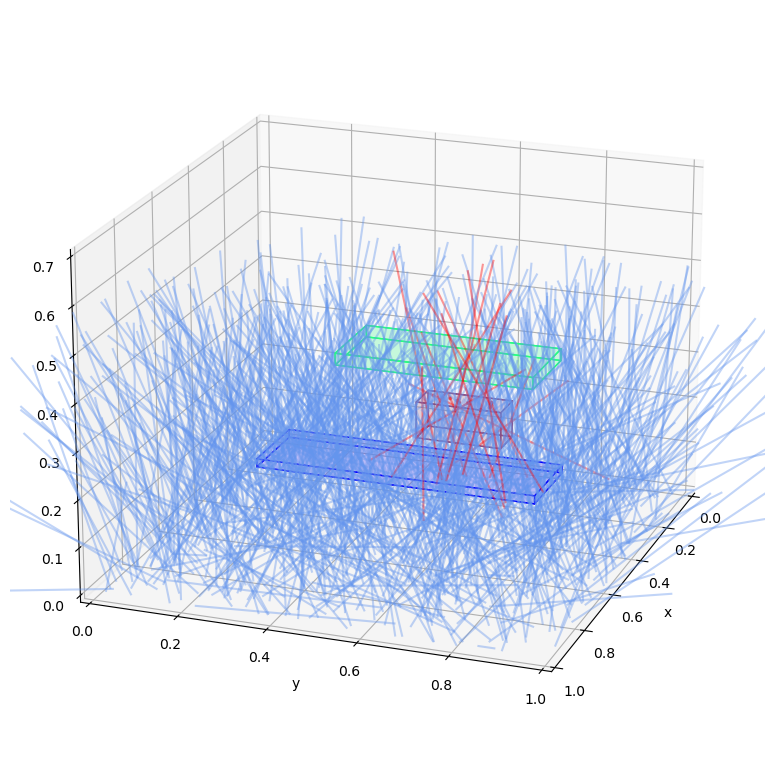

In [72]:
fig = plt.figure(figsize=(10,10),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
#print(z_dw)

xs, ys, zs = np.random.rand(n), np.random.random(n), np.zeros(n)

x1_cs = xs+ (quota_cs*us)/ws
y1_cs = ys + (quota_cs*vs)/ws
z1_cs = np.full(n, quota_cs)
quota_cs_inf =  z0_cs
x1_cs_2 = xs+ (quota_cs_inf*us)/ws
y1_cs_2 = ys + (quota_cs_inf*vs)/ws
z1_cs_2 = np.full(n, quota_cs_inf)
hits_cs_inf = ((x0_cs < x1_cs_2)&(x1_cs_2<(x0_cs + a_cs)) &(y0_cs < y1_cs_2) &(y1_cs_2<(y0_cs + b_cs)))
 
hits_2 = ((x0_cs < x1_cs)&(x1_cs<(x0_cs + a_cs)) &(y0_cs < y1_cs) &(y1_cs<(y0_cs + b_cs)))
hits = hits_2 + hits_cs_inf
colors_2 = ['red' if hit else 'cornflowerblue' for hit in hits]

ax.quiver(xs[:n], ys[:n], zs[:n], us[:n], vs[:n], ws[:n], length=0.5, arrow_length_ratio=0,
normalize=True, color=colors_2, alpha=0.4)




#ax.scatter(x_dw[hits], y_dw[hits], z_dw[hits], s=4, color='red')
#ax.scatter(x1_up[hits], y1_up[hits], z1_up[hits], s=4, color='red')
ax.scatter(x1_cs[hits_2], y1_cs[hits_2], z1_cs[hits_2], s=4, color='red')

ax.set_xlim3d(xmin, 1)
ax.set_ylim3d(ymin, 1)
ax.set_zlim3d(zmin, 0.7)
ax.set_xlabel('x')
ax.set_ylabel('y')

s_dw= createSolid([a_dw,b_dw,c_dw],[x0_dw,y0_dw,z0_dw], getImpactPlane = False, N = n)
ax.add_collection3d(s_dw)

s_up= createSolid([a_up,b_up,c_up],[x0_up,y0_up,z0_up], fillColor = "#24ff8120", edgeColor = '#24ff81',
                         getImpactPlane = False, N= n)
ax.add_collection3d(s_up)

csi, x_cs,y_cs = createSolid([a_cs,b_cs,c_cs], [x0_cs,y0_cs,z0_cs], 
                  fillColor = "#884e8420", edgeColor = '#884e84', 
                        getImpactPlane = True, N= n)
ax.add_collection3d(csi)

plt.show()

In [74]:
print(np.count_nonzero(hits), '/', hits.shape[0])

17 / 800
